In [2]:
import pandas as pd
df = pd.read_csv('../data/hotel_bookings.csv')
df

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [4]:
df.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [6]:
df['is_canceled'].value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

<AxesSubplot:>

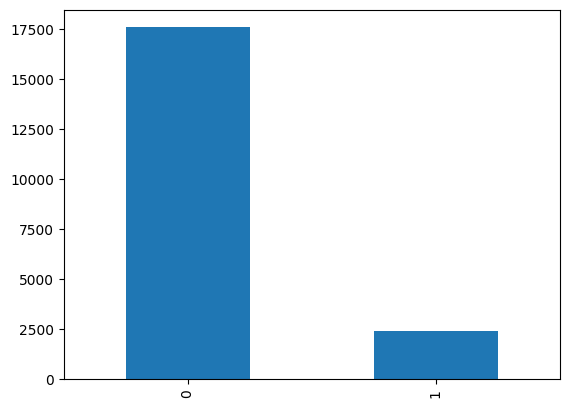

In [8]:
df['is_canceled'].value_counts().plot(kind='bar')

In [9]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


<AxesSubplot:>

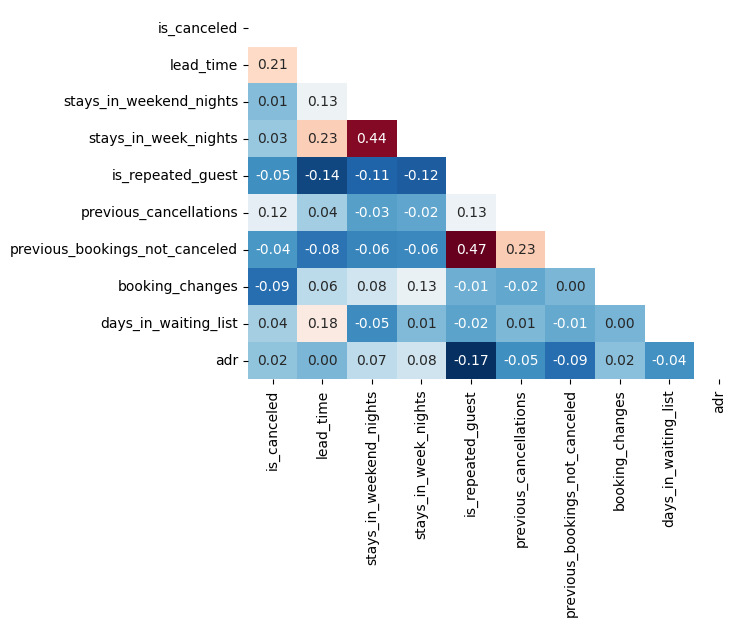

In [24]:
import seaborn as sns
import numpy as np
corr_df = df.corr()
mask = np.triu(np.ones(corr_df.shape, dtype='bool'))
sns.heatmap(corr_df, mask=mask, annot=True, cmap='RdBu_r', cbar=False, fmt='.2f')

In [29]:
df.groupby('deposit_type').median()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
deposit_type,,,,,,,,,,
No Deposit,0,47.0,1,2,0.0,0,0,0,0,95.0
Non Refund,1,175.0,0,2,0.0,0,0,0,0,89.0
Refundable,0,169.0,1,3,0.0,0,0,1,0,66.0


In [38]:
hotel_nonull = df.copy()

hotel_nonull.dropna(subset=['lead_time'], axis=0, inplace=True)

hotel_nonull['is_repeated_guest'].fillna(hotel_nonull['is_repeated_guest'].mode()[0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    0.0
19998    0.0
19999    0.0
Name: is_repeated_guest, Length: 19995, dtype: float64

In [39]:
fill_mean_func = lambda g: g.fillna(g.mean())
hotel_nonull = hotel_nonull.groupby('deposit_type').apply(fill_mean_func)

is_canceled deposit_type  lead_time  \
deposit_type                                              
No Deposit   0                0   No Deposit      105.0   
             1                0   No Deposit      303.0   
             2                0   No Deposit       33.0   
             3                0   No Deposit       48.0   
             4                0   No Deposit      216.0   
...                         ...          ...        ...   
Refundable   15249            0   Refundable      169.0   
             15428            0   Refundable      339.0   
             15661            0   Refundable      169.0   
             16644            0   Refundable      169.0   
             16851            0   Refundable      169.0   

                    stays_in_weekend_nights  stays_in_week_nights  \
deposit_type                                                        
No Deposit   0                            2                     5   
             1                            2                     2   
             2                            2                     3   
             3                            0                     1   
             4                            4                     7   
...                                     ...                   ...   
Refundable   15249                        0                     3   
             15428                        2                     5   
             15661                        1                     3   
             16644                        1                     3   
             16851                        1                     3   

                    is_repeated_guest  previous_cancellations  \
deposit_type                                                    
No Deposit   0               0.039532                       0   
             1               0.039532                       0   
             2               0.000000                       0   
             3               0.000000                       0   
             4               0.000000                       0   
...                               ...                     ...   
Refundable   15249           0.000000                       0   
             15428           0.000000                       0   
             15661           0.000000                       0   
             16644           0.000000                       0   
             16851           0.000000                       0   

                    previous_bookings_not_canceled  booking_changes  \
deposit_type                                                          
No Deposit   0                                   0                1   
             1                                   0                0   
             2                                   0                0   
             3                                   0                1   
             4                                   0                2   
...                                            ...              ...   
Refundable   15249                               0                1   
             15428                               0                1   
             15661                               0                2   
             16644                               0                1   
             16851                               0                0   

                    days_in_waiting_list         adr  
deposit_type                                          
No Deposit   0                         0  131.500000  
             1                         0   73.950000  
             2                         0  101.965827  
             3                         0   80.300000  
             4                         0   60.900000  
...                                  ...         ...  
Refundable   15249                     0   66.000000  
             15428                   150   44.360000  
             15661                

In [44]:
hotel_nonull.index = hotel_nonull.index.droplevel(0)
hotel_nonull.sort_index(inplace=True)
hotel_nonull.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

In [45]:
hotel_nonull

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,0.039532,0,0,1,0,131.500000
1,0,No Deposit,303.0,2,2,0.039532,0,0,0,0,73.950000
2,0,No Deposit,33.0,2,3,0.000000,0,0,0,0,101.965827
3,0,No Deposit,48.0,0,1,0.000000,0,0,1,0,80.300000
4,0,No Deposit,216.0,4,7,0.000000,0,0,2,0,60.900000
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.000000,0,0,0,0,62.000000
19996,1,Non Refund,101.0,0,3,0.000000,0,0,0,0,130.000000
19997,1,Non Refund,277.0,1,2,0.000000,0,0,0,0,100.000000
19998,1,No Deposit,0.0,0,1,0.000000,0,0,0,0,209.000000
